In [2]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
from os import listdir,path

In [3]:
img_path = './images/'
img_files = listdir(img_path)
len(img_files) , len(set(img_files))

(155, 155)

(480, 640, 3)


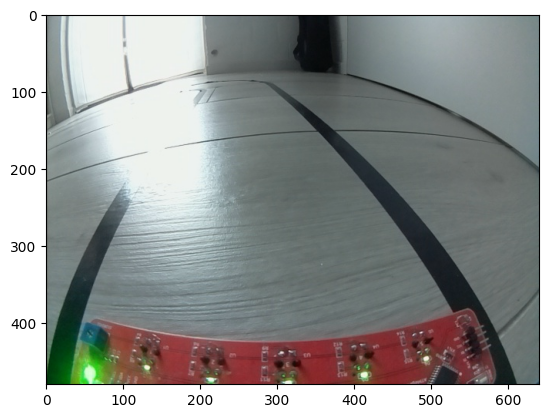

In [4]:
# Ansicht eines Beispielbildes (rot grün vertauscht)
img_example = cv2.imread(img_path + img_files[10])
plt.imshow(img_example)
print(img_example.shape)

In [5]:
# Einlesen aller Bilder -> Kontrolle der Anzahl
imgs = np.array([cv2.imread(img_path+i) for i in img_files])
imgs.shape

(155, 480, 640, 3)

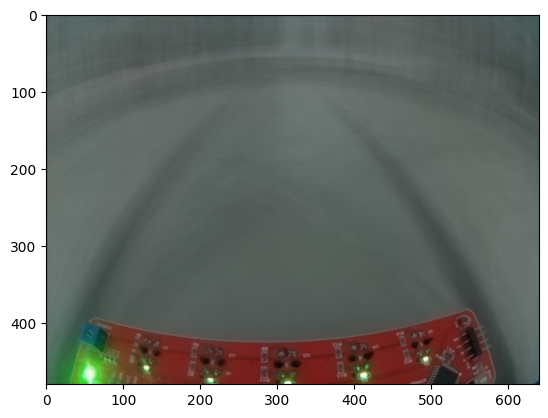

In [6]:
# Mittleres Bilder der Trainingsbilder
img_mean = imgs.mean(axis=0).astype('int')
plt.imshow(img_mean)

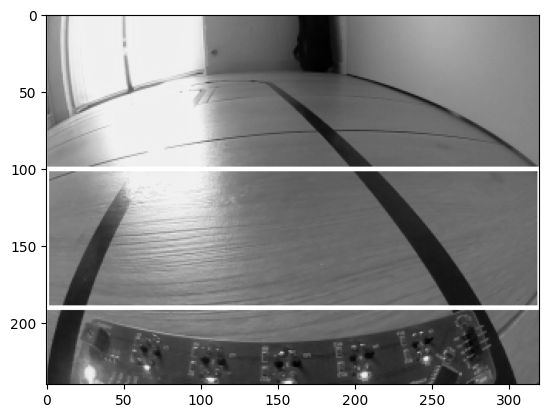

In [9]:
# Testweise Bildbearbeitung
sp=(0,190)
ep=(320,100)
dim = (320,240)
interpolation = cv2.INTER_AREA
img_example_x = img_example.copy()
img_example_x = cv2.cvtColor(img_example_x,cv2.COLOR_BGR2GRAY)
img_example_x= cv2.resize(img_example_x,dim,interpolation)
#plt.imshow(img_example_x)
plt.imshow(cv2.rectangle(img_example_x,sp,ep,(255,255,0),2),cmap='gray')

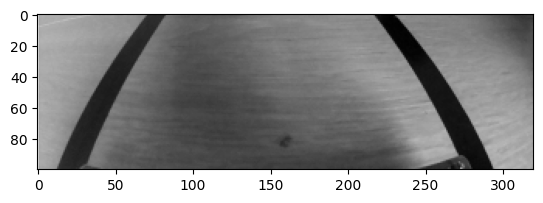

In [10]:
# Definition einer Funktion zur Vorverarbeitung eines einzelnen Trainingsbildes
# Dieser Verarbeitungsschritte müssen bei der Anwendungung des neuronlen Netzes
# am RPi ebenfalls in identischer Form durchgeführt werden.
def transform_image(img):
    dim = (320,240)
    interpolation = cv2.INTER_AREA
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Verwendung von Graustufenbildern
    img = cv2.resize(img,dim,interpolation) #  Anpassung der Bildgröße
    img = img[100:200,:] # Ausschneiden eines Teilbildes
    return img

plt.imshow(transform_image(imgs[0]),cmap='gray')

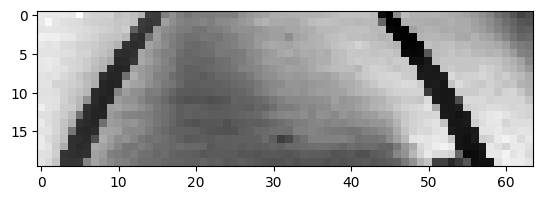

In [11]:
# Alternative mit Verkleinerung der Bilder
# Definition einer Funktion zur Vorverarbeitung der Trainingsbilder
def transform_image_small(img):
    dim = (64,48)
    interpolation = cv2.INTER_AREA
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Verwendung von Graustufenbildern
    img = cv2.resize(img,dim,interpolation) #  Anpassung der Bildgröße
    #img = img[100:200,:] # Ausschneiden eines Teilbildes
    img = img[20:40,:] # Ausschneiden eines Teilbildes
    return img

plt.imshow(transform_image_small(imgs[0]),cmap='gray')

In [12]:
# Laden und Vorverarbeiten aller Trainingsbilder (groß)
imgs_large = np.array([transform_image(cv2.imread(img_path+i)) for i in img_files])
imgs_large.shape

(155, 100, 320)

In [13]:
imgs_small = np.array([transform_image_small(cv2.imread(img_path+i)) for i in img_files])
imgs_small.shape

(155, 20, 64)

In [17]:
# Position des Lenkwinkels im Filenamen (abhängig von gewählter Vorgehensweise)
x = img_files[0]
print(x)
print('-',x[-7:-4],'-') # Raspberry/Linux
print('-',x[50:-4],'-') # Windows

IMG_SRC_65a1ac49_20240422_16-10-41_0168_S000_A091.jpg
- 091 -
-  -


In [18]:
angles = np.array([int(i[-7:-4]) for i in img_files]) # Extrahieren der Lenkwinkel aus dem Dateinamen